In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [84]:
# load data
df = pd.read_csv('data/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


<Axes: >

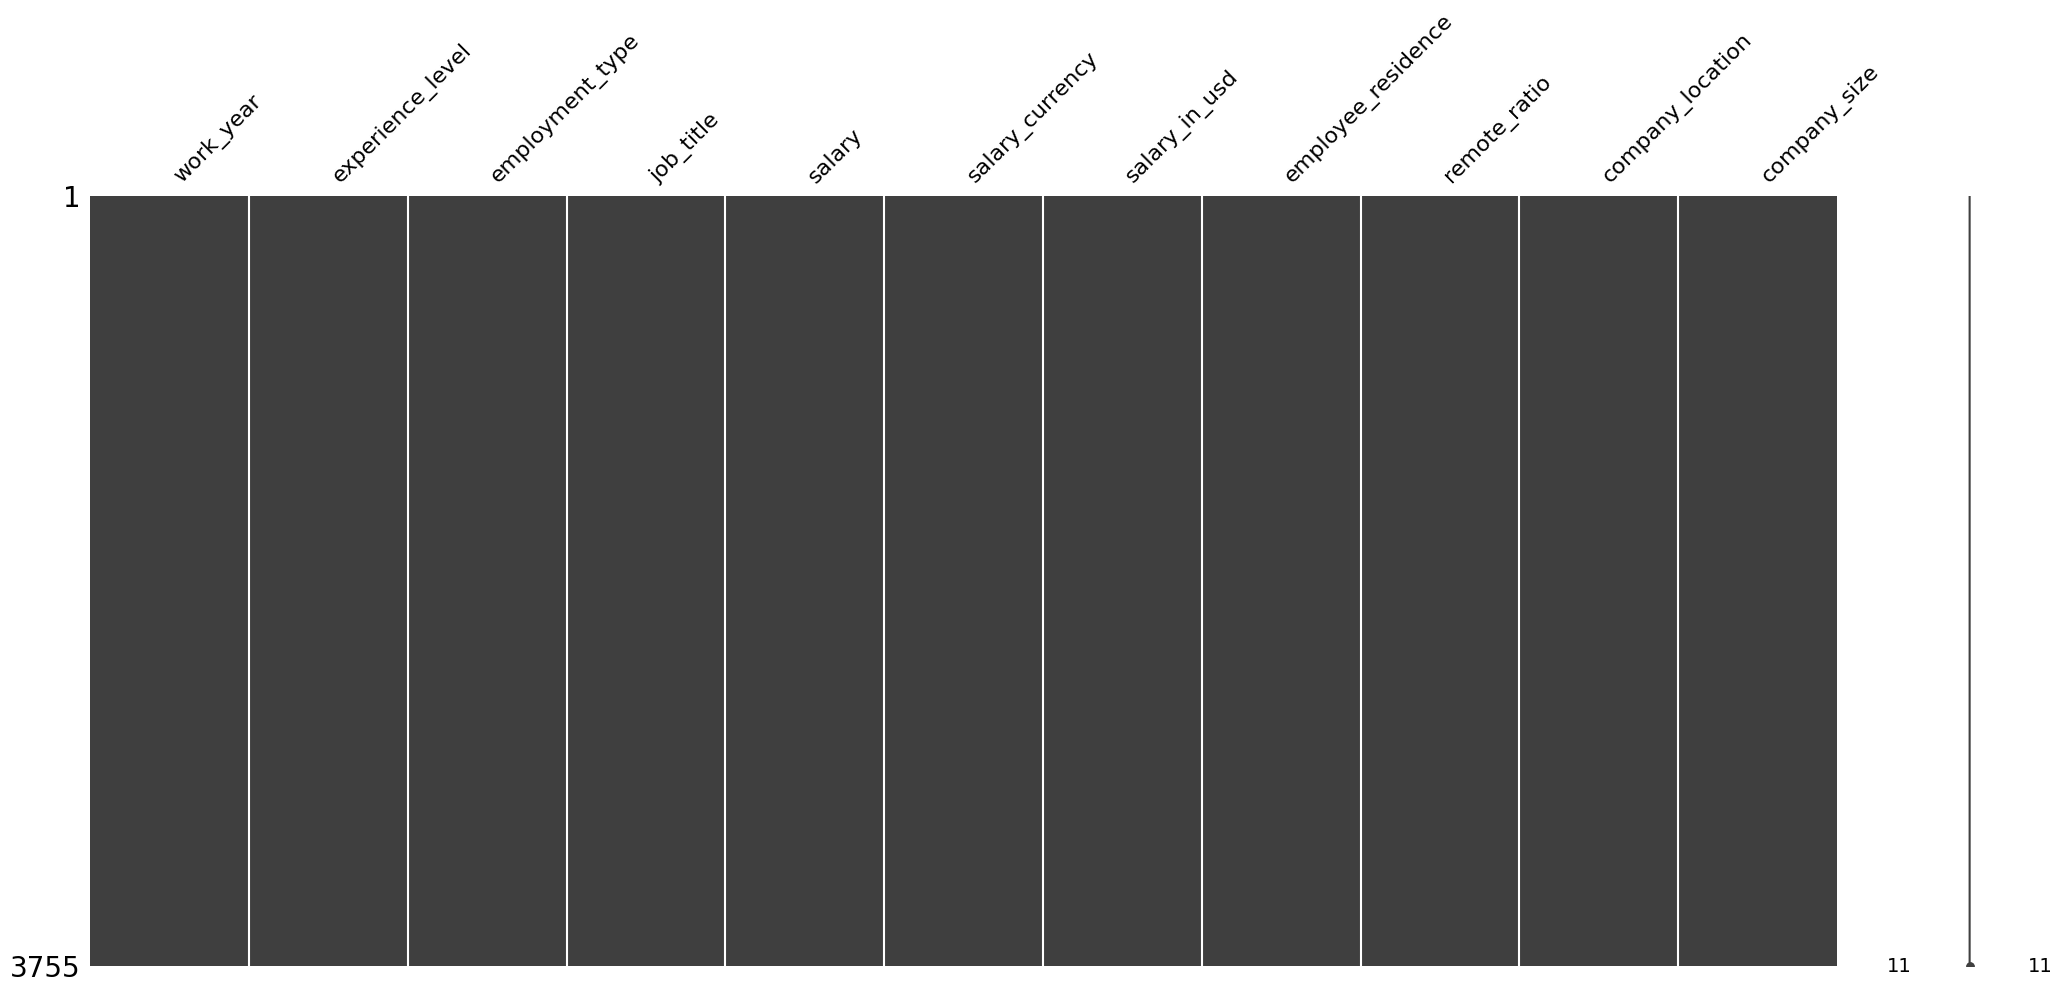

In [85]:
# check for missing values
msno.matrix(df)

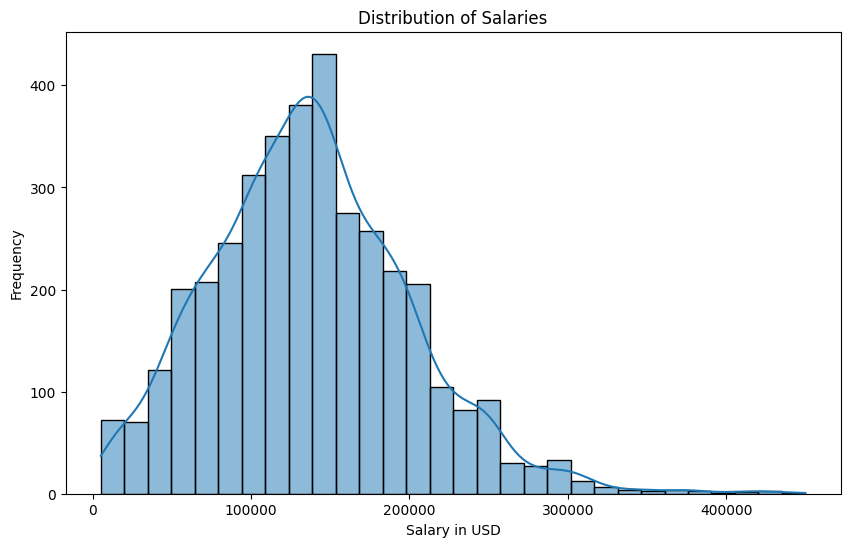

In [86]:
# distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

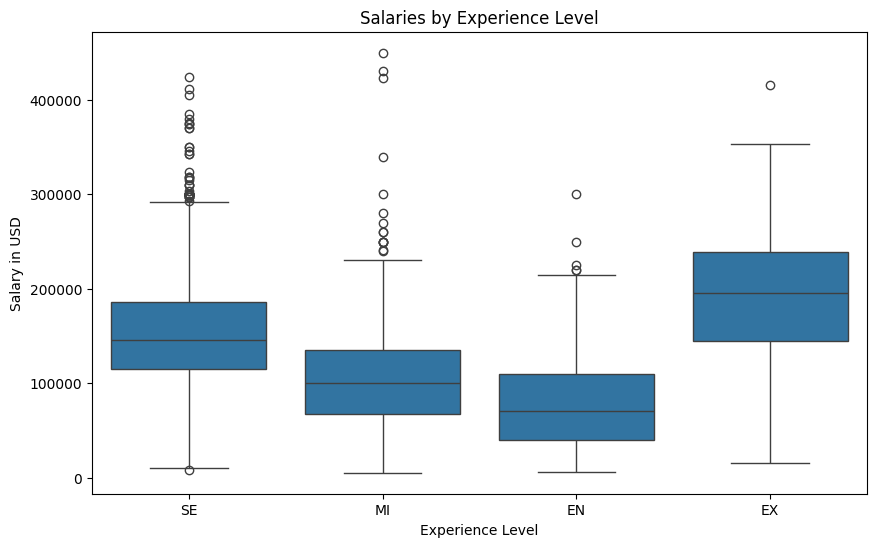

In [87]:
# distribution of salaries by experience level
plt.figure(figsize=(10, 6))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title('Salaries by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.show()

In [88]:
df['job_title'].value_counts()

job_title
Data Engineer                               1040
Data Scientist                               840
Data Analyst                                 612
Machine Learning Engineer                    289
Analytics Engineer                           103
Data Architect                               101
Research Scientist                            82
Data Science Manager                          58
Applied Scientist                             58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
AI Scientist                                  16
BI Data Analyst                               15
Business Data Analyst                         15
Data Specialist                               14
BI Develop

In [89]:
# remove specific words from job titles
to_remove = ['Azure', 'AWS', 'GCP', 'BI', 'Power BI', 'Power', 'Finance', 'Compliance', 'Marketing', 'Staff', 'Principal', 'Tech Lead',' Cloud','Financial' ]
df['job_title'] = df['job_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in to_remove]))
#show full
pd.set_option('display.max_rows', None)
df['job_title'].value_counts()


job_title
Data Engineer                               1045
Data Scientist                               849
Data Analyst                                 637
Machine Learning Engineer                    290
Analytics Engineer                           103
Data Architect                               102
Research Scientist                            82
Applied Scientist                             58
Data Science Manager                          58
Research Engineer                             37
ML Engineer                                   34
Data Manager                                  29
Machine Learning Scientist                    26
Data Science Consultant                       24
Data Analytics Manager                        22
Computer Vision Engineer                      18
AI Scientist                                  16
Business Data Analyst                         15
Data Specialist                               14
Developer                                     14
Applied Ma

In [90]:
# make experence cumulative
def cumulative_experience_encoding(df):
    level_order = ['EN', 'MI', 'SE', 'EX'] # Define the order of levels
    for level in level_order:
        df[f'experience_level_{level}'] = False # Initialize all to False

    for index, row in df.iterrows():
        level = row['experience_level']
        if level == 'EN':
            df.at[index, 'experience_level_EN'] = True
        elif level == 'MI':
            df.at[index, 'experience_level_EN'] = True
            df.at[index, 'experience_level_MI'] = True
        elif level == 'SE':
            df.at[index, 'experience_level_EN'] = True
            df.at[index, 'experience_level_MI'] = True
            df.at[index, 'experience_level_SE'] = True
        elif level == 'EX':
            for l in level_order: # For EX, all levels are true
                df.at[index, f'experience_level_{l}'] = True
    return df

df = cumulative_experience_encoding(df)
df.drop(columns=['experience_level'], inplace=True)
df.head()

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_EN,experience_level_MI,experience_level_SE,experience_level_EX
0,2023,FT,Data Scientist,80000,EUR,85847,ES,100,ES,L,True,True,True,False
1,2023,CT,ML Engineer,30000,USD,30000,US,100,US,S,True,True,False,False
2,2023,CT,ML Engineer,25500,USD,25500,US,100,US,S,True,True,False,False
3,2023,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,True,True,True,False
4,2023,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,True,True,True,False


In [91]:
# maybe remove emploment type?
# one hot encode emploment type
df = pd.get_dummies(df, columns=['employment_type'])
df.head()

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_EN,experience_level_MI,experience_level_SE,experience_level_EX,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT
0,2023,Data Scientist,80000,EUR,85847,ES,100,ES,L,True,True,True,False,False,False,True,False
1,2023,ML Engineer,30000,USD,30000,US,100,US,S,True,True,False,False,True,False,False,False
2,2023,ML Engineer,25500,USD,25500,US,100,US,S,True,True,False,False,True,False,False,False
3,2023,Data Scientist,175000,USD,175000,CA,100,CA,M,True,True,True,False,False,False,True,False
4,2023,Data Scientist,120000,USD,120000,CA,100,CA,M,True,True,True,False,False,False,True,False


In [92]:
# new column for if employee_location is in the same country as company_location
df['same_country'] = df['employee_residence'] == df['company_location']
df.head()

,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_EN,experience_level_MI,experience_level_SE,experience_level_EX,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,same_country
0,2023,Data Scientist,80000,EUR,85847,ES,100,ES,L,True,True,True,False,False,False,True,False,True
1,2023,ML Engineer,30000,USD,30000,US,100,US,S,True,True,False,False,True,False,False,False,True
2,2023,ML Engineer,25500,USD,25500,US,100,US,S,True,True,False,False,True,False,False,False,True
3,2023,Data Scientist,175000,USD,175000,CA,100,CA,M,True,True,True,False,False,False,True,False,True
4,2023,Data Scientist,120000,USD,120000,CA,100,CA,M,True,True,True,False,False,False,True,False,True


In [93]:
#one hot encode company size
df = pd.get_dummies(df, columns=['company_size'])
df.head()


,work_year,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_EN,experience_level_MI,experience_level_SE,experience_level_EX,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,same_country,company_size_L,company_size_M,company_size_S
0,2023,Data Scientist,80000,EUR,85847,ES,100,ES,True,True,True,False,False,False,True,False,True,True,False,False
1,2023,ML Engineer,30000,USD,30000,US,100,US,True,True,False,False,True,False,False,False,True,False,False,True
2,2023,ML Engineer,25500,USD,25500,US,100,US,True,True,False,False,True,False,False,False,True,False,False,True
3,2023,Data Scientist,175000,USD,175000,CA,100,CA,True,True,True,False,False,False,True,False,True,False,True,False
4,2023,Data Scientist,120000,USD,120000,CA,100,CA,True,True,True,False,False,False,True,False,True,False,True,False


In [94]:
# make encoded columns
df_encoded = df.drop(columns=['salary', 'salary_currency'])
#df_encoded = pd.get_dummies(df_encoded, columns=['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['job_title'] = le.fit_transform(df_encoded['job_title'])
df_encoded['employee_residence'] = le.fit_transform(df_encoded['employee_residence'])
df_encoded['company_location'] = le.fit_transform(df_encoded['company_location'])

df_encoded.head()

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_EN,experience_level_MI,experience_level_SE,experience_level_EX,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,same_country,company_size_L,company_size_M,company_size_S
0,2023,42,85847,ES,100,ES,True,True,True,False,False,False,True,False,True,True,False,False
1,2023,60,30000,US,100,US,True,True,False,False,True,False,False,False,True,False,False,True
2,2023,60,25500,US,100,US,True,True,False,False,True,False,False,False,True,False,False,True
3,2023,42,175000,CA,100,CA,True,True,True,False,False,False,True,False,True,False,True,False
4,2023,42,120000,CA,100,CA,True,True,True,False,False,False,True,False,True,False,True,False


In [95]:
# export data
#df.to_csv('data/encoded_data.csv', index=False)

: 

In [81]:
# Simple decision tree model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Initialize the model
model = DecisionTreeRegressor()

# Get all feature columns except salary_in_usd (our target variable)
features = [col for col in train_df.columns if col != 'salary_in_usd']

# Train the model
model.fit(train_df[features], train_df['salary_in_usd'])

# Make predictions on the test set
predictions = model.predict(test_df[features])

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(test_df['salary_in_usd'], predictions)}")
print(f"R-squared: {r2_score(test_df['salary_in_usd'], predictions)}")
print(f"Accuracy: {model.score(test_df[features], test_df['salary_in_usd'])}")

# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance.head(10))  # Show top 10 most important features


Mean Squared Error: 2863458422.2776747
R-squared: 0.2746679682460771
Accuracy: 0.2746679682460771
                Feature  Importance
2    employee_residence    0.424782
1             job_title    0.236911
7   experience_level_SE    0.115760
0             work_year    0.061331
3          remote_ratio    0.043979
8   experience_level_EX    0.025264
4      company_location    0.023624
15       company_size_M    0.018916
14       company_size_L    0.016871
6   experience_level_MI    0.011601


In [79]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(train_df[features], train_df['salary_in_usd'])

# Make predictions on the test set
predictions = model.predict(test_df[features])

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(test_df['salary_in_usd'], predictions)}")
print(f"R-squared: {r2_score(test_df['salary_in_usd'], predictions)}")
print(f"Accuracy: {model.score(test_df[features], test_df['salary_in_usd'])}")

# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': model.coef_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance.head(10))  # Show top 10 most important features



Mean Squared Error: 2664076341.257371
R-squared: 0.3251727036376072
Accuracy: 0.3251727036376072
                Feature    Importance
8   experience_level_EX  47588.230069
7   experience_level_SE  34798.697519
13         same_country  20275.859297
6   experience_level_MI  18172.736571
9    employment_type_CT  13215.856873
11   employment_type_FT  10458.629078
14       company_size_L   8188.154603
0             work_year   7736.358222
15       company_size_M   4004.712080
4      company_location    678.787405
